In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display

sns.set_style("darkgrid")

CLEANING THE DATA

In [51]:
df = pd.read_csv("../data/asylum_seekers.csv", low_memory=False)
df.head(10)

,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273,150,0
5,2000,Ukraine,Afghanistan,G / FI,40,0,662,275,0,412,0,687,23,0
6,2000,Turkey,Afghanistan,U / FI,67,67,81,29,0,24,49,102,46,46
7,2000,Turkmenistan,Afghanistan,U / FI,416,416,169,126,0,121,210,457,128,128
8,2000,Tajikistan,Afghanistan,G / FI,2172,30,165,112,0,0,1992,2104,233,40
9,2000,Thailand,Afghanistan,U / AR,0,0,2,1,0,1,0,2,0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129720 entries, 0 to 129719
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Year                                     129720 non-null  int64 
 1   Country / territory of asylum/residence  129720 non-null  object
 2   Origin                                   129720 non-null  object
 3   RSD procedure type / level               129719 non-null  object
 4   Tota pending start-year                  124578 non-null  object
 5   of which UNHCR-assisted(start-year)      118962 non-null  object
 6   Applied during year                      126222 non-null  object
 7   decisions_recognized                     119886 non-null  object
 8   decisions_other                          114974 non-null  object
 9   Rejected                                 121615 non-null  object
 10  Otherwise closed                         120

In [53]:
df.describe()

,Year
count,129720.000000
mean,2009.053500
std,4.877886
min,2000.000000
25%,2005.000000
50%,2010.000000
75%,2013.000000
max,2016.000000


In [54]:
df.columns

Index(['Year', 'Country / territory of asylum/residence', 'Origin',
       'RSD procedure type / level', 'Tota pending start-year',
       'of which UNHCR-assisted(start-year)', 'Applied during year',
       'decisions_recognized', 'decisions_other', 'Rejected',
       'Otherwise closed', 'Total decisions', 'Total pending end-year',
       'of which UNHCR-assisted(end-year)'],
      dtype='object')

In [55]:
df.isna().sum()

Year                                           0
Country / territory of asylum/residence        0
Origin                                         0
RSD procedure type / level                     1
Tota pending start-year                     5142
of which UNHCR-assisted(start-year)        10758
Applied during year                         3498
decisions_recognized                        9834
decisions_other                            14746
Rejected                                    8105
Otherwise closed                            8870
Total decisions                            32638
Total pending end-year                      3888
of which UNHCR-assisted(end-year)           7837
dtype: int64

In [56]:
df = df.fillna(value="")

In [57]:
df.isna().sum()

Year                                       0
Country / territory of asylum/residence    0
Origin                                     0
RSD procedure type / level                 0
Tota pending start-year                    0
of which UNHCR-assisted(start-year)        0
Applied during year                        0
decisions_recognized                       0
decisions_other                            0
Rejected                                   0
Otherwise closed                           0
Total decisions                            0
Total pending end-year                     0
of which UNHCR-assisted(end-year)          0
dtype: int64

In [58]:
df = df.replace(["*"], [""])

In [59]:
labels = ['year',
          'country_of_residence',
          'country_of_origin',
          'rsd_type',
          'total_pending_at_year_start',
          'total_pending_year_start_UNHCR_assisted',
          'applied_during_year',
          'decisions_recognized',
          'decisions_other',
          'rejected',
          'otherwise_closed',
          'total_decisions',
          'total_pending_at_year_end',
          'total_pending_year_end_UNHCR_assisted']

df.columns = labels

In [60]:
print(df.head())

   year      country_of_residence country_of_origin rsd_type  \
0  2000                  Zimbabwe       Afghanistan   G / FI   
1  2000              South Africa       Afghanistan   G / FI   
2  2000                Uzbekistan       Afghanistan   U / FI   
3  2000  United States of America       Afghanistan   G / EO   
4  2000  United States of America       Afghanistan   G / IN   

  total_pending_at_year_start total_pending_year_start_UNHCR_assisted  \
0                           0                                       0   
1                           8                                       1   
2                         265                                     265   
3                         196                                       0   
4                         193                                       0   

  applied_during_year decisions_recognized decisions_other rejected  \
0                   5                    5               0        0   
1                   0             

In [61]:
df.columns

Index(['year', 'country_of_residence', 'country_of_origin', 'rsd_type',
       'total_pending_at_year_start',
       'total_pending_year_start_UNHCR_assisted', 'applied_during_year',
       'decisions_recognized', 'decisions_other', 'rejected',
       'otherwise_closed', 'total_decisions', 'total_pending_at_year_end',
       'total_pending_year_end_UNHCR_assisted'],
      dtype='object')

In [62]:
# convert 'applied_during_year' to numeric
df['applied_during_year'] = pd.to_numeric(df['applied_during_year'], errors='coerce')

In [63]:
df.head()

,year,country_of_residence,country_of_origin,rsd_type,total_pending_at_year_start,total_pending_year_start_UNHCR_assisted,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_at_year_end,total_pending_year_end_UNHCR_assisted
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5.0,5,0,0,0,5,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0.0,0,0,0,0,,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156.0,747,0,112,327,1186,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225.0,151,0,31,68,250,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218.0,182,0,51,40,273,150,0


In [64]:
type(df['applied_during_year'])

pandas.core.series.Series

In [65]:
type(df)

pandas.core.frame.DataFrame

In [66]:
# convert all numeric columns to floats
cols =  ['total_pending_at_year_start',
          'total_pending_year_start_UNHCR_assisted',
          'applied_during_year',
          'decisions_recognized',
          'decisions_other',
          'rejected',
          'otherwise_closed',
          'total_decisions',
          'total_pending_at_year_end',
          'total_pending_year_end_UNHCR_assisted']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].astype(float)

In [67]:
# format 'rsd' as list of strings
df.rsd_type = [[x[:1], x[:4]] for x in df.rsd_type]

In [68]:
df[0:3]

,year,country_of_residence,country_of_origin,rsd_type,total_pending_at_year_start,total_pending_year_start_UNHCR_assisted,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_at_year_end,total_pending_year_end_UNHCR_assisted
0,2000,Zimbabwe,Afghanistan,"[G, G / ]",0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
1,2000,South Africa,Afghanistan,"[G, G / ]",8.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,8.0,0.0
2,2000,Uzbekistan,Afghanistan,"[U, U / ]",265.0,265.0,2156.0,747.0,0.0,112.0,327.0,1186.0,1235.0,1235.0


In [69]:
# replace lenghty country names with shorter names 
df = df.replace(['Syrian Arab Republic'], ['Syria'])
df = df.replace(['United States of America'], ['United States'])
df = df.replace(['Serbia and Kosovo (S/RES/1244 (1999))'], ['Serbia/Kosovo'])
df = df.replace(['Venezuelan (Bolivarian Republic of)'], ['Venezuela'])

COMPARING COUNTRY OF ORIGIN APPLICATION RATES

In [70]:
# CHECK THE QUANTITY OF COUNTRIES OF RESIDENCE IN THE DATAFRAME
len(df.country_of_residence.unique())

190

In [71]:
# CHECK THE QUANTITY OF COUNTRIES OF ORIGIN IN THE DATAFRAME
len(df.country_of_origin.unique())

222

In [72]:
# FILTER DATAFRAME BY YEAR
df_2016 = df.query('year == 2016')
df_2010 = df.query('year == 2010')

In [73]:
# TOP 10 COUNTRIES OF ORIGIN IN 2016
top_10_countries_of_origin_2016 = df_2016.country_of_origin.value_counts().head(10)
print(top_10_countries_of_origin_2016)

Syrian Arab Rep.          189
Iraq                      162
Afghanistan               156
Nigeria                   154
Pakistan                  153
Somalia                   150
Dem. Rep. of the Congo    149
Cameroon                  149
Iran (Islamic Rep. of)    148
Eritrea                   142
Name: country_of_origin, dtype: int64


<AxesSubplot:title={'center':'Top 10 Countries of Origin in 2016'}, ylabel='Country of Origin'>

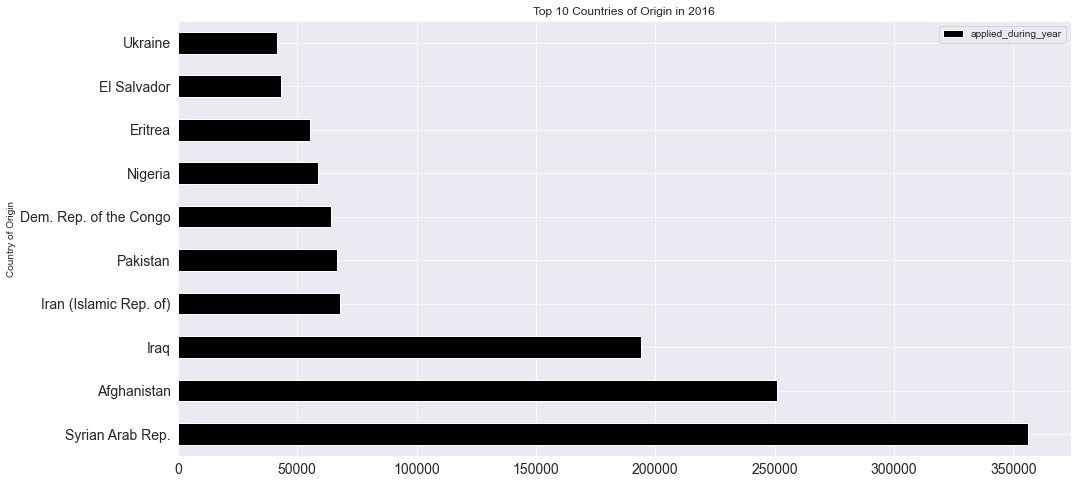

In [74]:
sum_2016 = df_2016.groupby(['country_of_origin'])[['applied_during_year']].aggregate('sum')
top_10_countries_of_origin_2016 = sum_2016.sort_values(by=['applied_during_year'], ascending=False).head(10)
chart_2016 = top_10_countries_of_origin_2016.plot.barh(
    figsize = [16, 8],
    fontsize = 14,
    title = 'Top 10 Countries of Origin in 2016',
    color = 'black'
)
chart_2016.set_ylabel('Country of Origin')
chart_2016

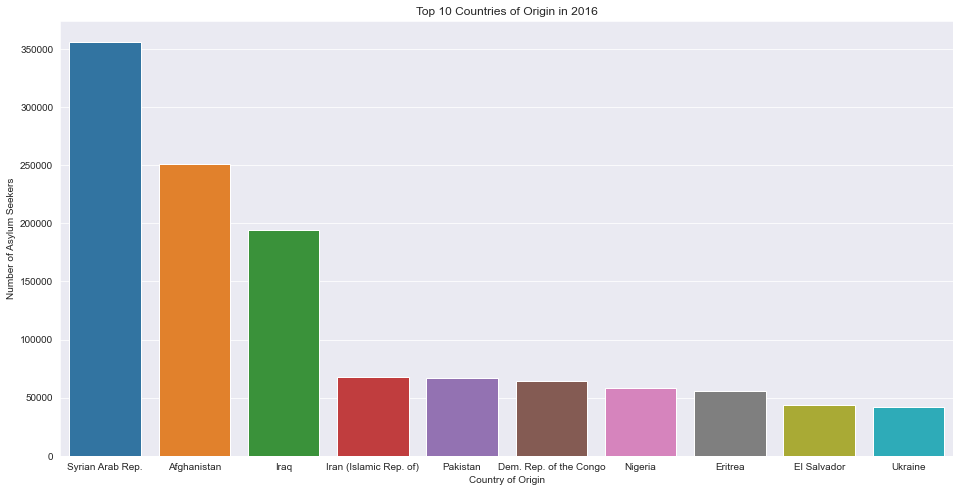

In [75]:
# plot the 10 countries of origin in 2016 using seaborn
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(x=top_10_countries_of_origin_2016.index, y=top_10_countries_of_origin_2016.applied_during_year)
plt.title('Top 10 Countries of Origin in 2016')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Asylum Seekers')
plt.show()

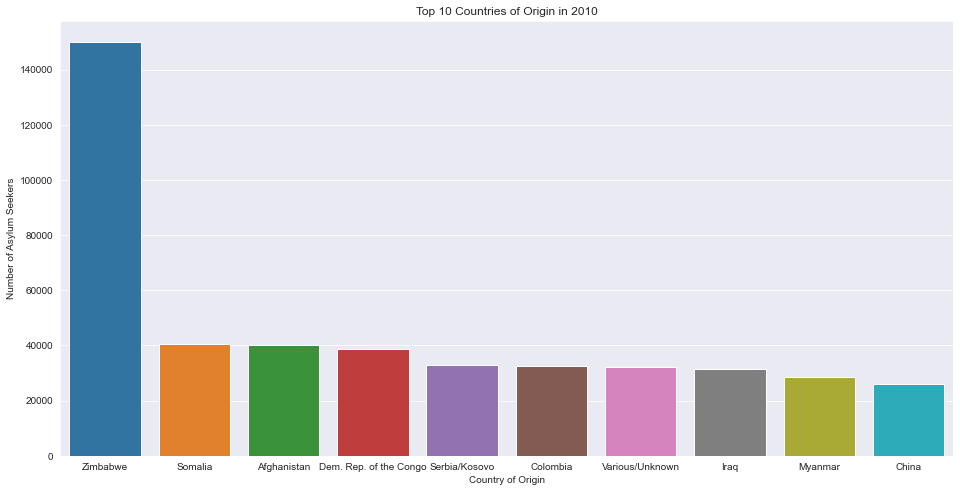

In [76]:
# TOP 10 APPLICATIONS IN 2010
sum_2010 = df_2010.groupby(['country_of_origin'])[['applied_during_year']].aggregate('sum')
top_10_countries_of_origin_2010 = sum_2010.sort_values(by=['applied_during_year'], ascending=False).head(10)
plt.figure(figsize=(16, 8))
sns.barplot(x=top_10_countries_of_origin_2010.index, y=top_10_countries_of_origin_2010.applied_during_year)
plt.title('Top 10 Countries of Origin in 2010')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Asylum Seekers')
plt.show()

SELECT SOME COUNTRIES OF INTEREST AND SEE CHANGES THAT HAVE HAPPENED IN COUNTRIES OF ORIGIN FROM 2010-2016

In [77]:
df.head(10)

,year,country_of_residence,country_of_origin,rsd_type,total_pending_at_year_start,total_pending_year_start_UNHCR_assisted,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_at_year_end,total_pending_year_end_UNHCR_assisted
0,2000,Zimbabwe,Afghanistan,"[G, G / ]",0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
1,2000,South Africa,Afghanistan,"[G, G / ]",8.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,8.0,0.0
2,2000,Uzbekistan,Afghanistan,"[U, U / ]",265.0,265.0,2156.0,747.0,0.0,112.0,327.0,1186.0,1235.0,1235.0
3,2000,United States,Afghanistan,"[G, G / ]",196.0,0.0,225.0,151.0,0.0,31.0,68.0,250.0,171.0,0.0
4,2000,United States,Afghanistan,"[G, G / ]",193.0,0.0,218.0,182.0,0.0,51.0,40.0,273.0,150.0,0.0
5,2000,Ukraine,Afghanistan,"[G, G / ]",40.0,0.0,662.0,275.0,0.0,412.0,0.0,687.0,23.0,0.0
6,2000,Turkey,Afghanistan,"[U, U / ]",67.0,67.0,81.0,29.0,0.0,24.0,49.0,102.0,46.0,46.0
7,2000,Turkmenistan,Afghanistan,"[U, U / ]",416.0,416.0,169.0,126.0,0.0,121.0,210.0,457.0,128.0,128.0
8,2000,Tajikistan,Afghanistan,"[G, G / ]",2172.0,30.0,165.0,112.0,0.0,0.0,1992.0,2104.0,233.0,40.0
9,2000,Thailand,Afghanistan,"[U, U / ]",0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0


In [78]:
df.country_of_origin.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Rep.', 'Canada', 'Switzerland', 'Chile', 'China',
       "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. of the Congo', 'Congo',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Cyprus', 'Czech Rep.', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Rep.', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Gibraltar', 'Guinea', 'Gambia', 'Guinea-Bissau',


In [79]:
# see if syria is in the dataframe
df.query('country_of_origin == "China"')

,year,country_of_residence,country_of_origin,rsd_type,total_pending_at_year_start,total_pending_year_start_UNHCR_assisted,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_at_year_end,total_pending_year_end_UNHCR_assisted
765,2000,South Africa,China,"[G, G / ]",413.0,0.0,104.0,0.0,0.0,125.0,0.0,125.0,392.0,0.0
766,2000,United States,China,"[G, G / ]",4209.0,0.0,5541.0,2522.0,0.0,2842.0,1300.0,6664.0,4021.0,0.0
767,2000,United States,China,"[G, G / ]",6998.0,0.0,8647.0,612.0,0.0,3055.0,4198.0,7865.0,7789.0,0.0
768,2000,Turkey,China,"[U, U / ]",13.0,13.0,11.0,11.0,0.0,3.0,0.0,14.0,10.0,10.0
769,2000,Thailand,China,"[U, U / ]",0.0,0.0,27.0,6.0,0.0,18.0,0.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120840,2016,Ukraine,China,"[G, G / ]",NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
120841,2016,United States,China,"[G, G / ]",22617.0,NaN,2115.0,3131.0,NaN,563.0,4221.0,7915.0,19797.0,NaN
120842,2016,United States,China,"[G, G / ]",22908.0,NaN,17753.0,1040.0,NaN,16.0,2113.0,3169.0,37653.0,NaN
120843,2016,South Africa,China,"[G, G / ]",130.0,13.0,NaN,NaN,NaN,NaN,130.0,130.0,0.0,NaN


In [80]:
df.query('country_of_origin == "Brazil"')

,year,country_of_residence,country_of_origin,rsd_type,total_pending_at_year_start,total_pending_year_start_UNHCR_assisted,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_at_year_end,total_pending_year_end_UNHCR_assisted
663,2000,United States,Brazil,"[G, G / ]",187.0,0.0,226.0,13.0,0.0,60.0,160.0,233.0,180.0,0.0
664,2000,United States,Brazil,"[G, G / ]",609.0,0.0,78.0,15.0,0.0,86.0,239.0,340.0,393.0,0.0
665,2000,Sweden,Brazil,"[G, G / ]",0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
666,2000,Portugal,Brazil,"[G, G / ]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
667,2000,Netherlands,Brazil,"[G, G / ]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120511,2016,Sweden,Brazil,"[G, G / ]",0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
120512,2016,Sweden,Brazil,"[G, G / ]",12.0,NaN,11.0,0.0,0.0,14.0,8.0,22.0,NaN,NaN
120513,2016,Uruguay,Brazil,"[G, G / ]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
120514,2016,United States,Brazil,"[G, G / ]",839.0,NaN,490.0,7.0,NaN,45.0,191.0,243.0,1480.0,NaN


In [81]:
df.query("country_of_origin == 'Canada'")


,year,country_of_residence,country_of_origin,rsd_type,total_pending_at_year_start,total_pending_year_start_UNHCR_assisted,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_at_year_end,total_pending_year_end_UNHCR_assisted
727,2000,United States,Canada,"[G, G / ]",13.0,0.0,11.0,4.0,0.0,4.0,9.0,17.0,7.0,0.0
728,2000,Sweden,Canada,"[G, G / ]",0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
729,2000,Norway,Canada,"[G, G / ]",0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
730,2000,Netherlands,Canada,"[G, G / ]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
731,2000,Netherlands,Canada,"[G, G / ]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120697,2016,Sweden,Canada,"[G, G / ]",NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
120698,2016,Sweden,Canada,"[G, G / ]",NaN,NaN,NaN,0.0,0.0,NaN,NaN,6.0,NaN,NaN
120699,2016,Uganda,Canada,"[G, G / ]",NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
120700,2016,United States,Canada,"[G, G / ]",7.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,9.0,NaN


In [89]:
# check if Syria is in the dataframe
syria_df = df.query('country_of_origin == "Syrian Arab Rep."')
syria_df

,year,country_of_residence,country_of_origin,rsd_type,total_pending_at_year_start,total_pending_year_start_UNHCR_assisted,applied_during_year,decisions_recognized,decisions_other,rejected,otherwise_closed,total_decisions,total_pending_at_year_end,total_pending_year_end_UNHCR_assisted
4359,2000,Yemen,Syrian Arab Rep.,"[U, U / ]",0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4360,2000,United States,Syrian Arab Rep.,"[G, G / ]",80.0,0.0,32.0,26.0,0.0,21.0,20.0,67.0,59.0,0.0
4361,2000,United States,Syrian Arab Rep.,"[G, G / ]",117.0,0.0,91.0,18.0,0.0,18.0,63.0,99.0,109.0,0.0
4362,2000,Ukraine,Syrian Arab Rep.,"[G, G / ]",8.0,0.0,22.0,12.0,0.0,9.0,0.0,21.0,3.0,0.0
4363,2000,Turkey,Syrian Arab Rep.,"[U, U / ]",1.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128068,2016,Venezuela (Bolivarian Republic of),Syrian Arab Rep.,"[G, G / ]",NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,18.0,14.0
128069,2016,Yemen,Syrian Arab Rep.,"[U, U / ]",615.0,615.0,NaN,14.0,NaN,NaN,99.0,113.0,502.0,502.0
128070,2016,South Africa,Syrian Arab Rep.,"[G, G / ]",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
128071,2016,South Africa,Syrian Arab Rep.,"[G, G / ]",53.0,5.0,20.0,12.0,NaN,12.0,NaN,24.0,49.0,NaN


In [92]:
len(syria_df)

1826

In [93]:
len(syria_df.country_of_residence.unique())

152

Text(0.5, 1.0, 'Top 10 Countries of Residence for Syrian Refugees')

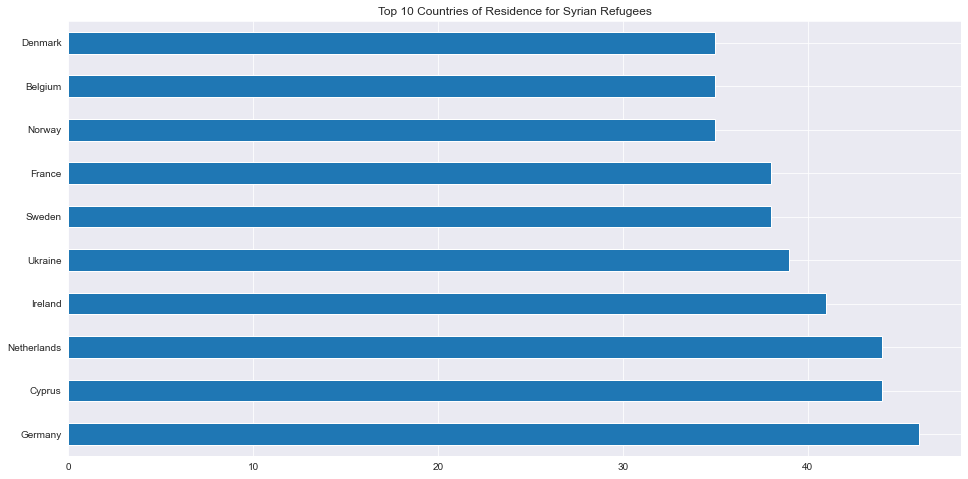

In [94]:
country_count = syria_df.country_of_residence.value_counts()
top_10_countries_of_residence = country_count.sort_values(ascending=False).head(10)
top_10 = top_10_countries_of_residence.plot.barh(
    figsize = [16, 8]
)
top_10.set_title('Top 10 Countries of Residence for Syrian Refugees')

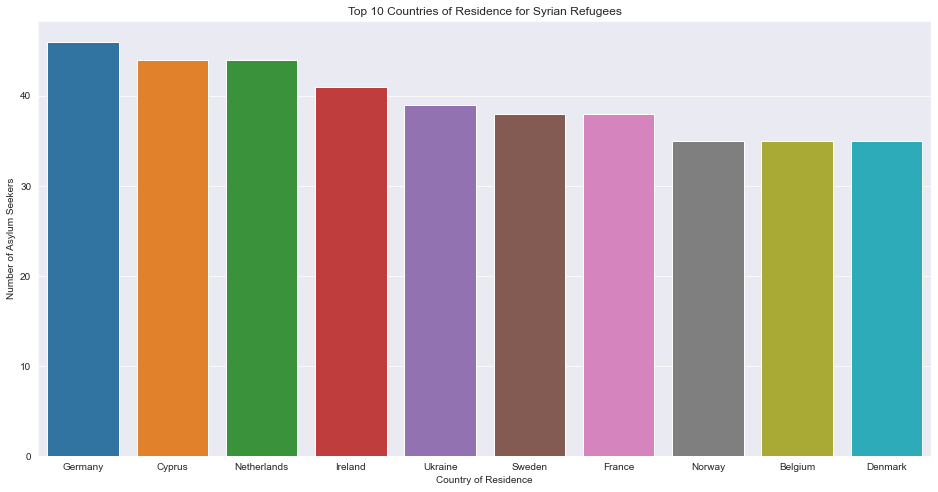

In [100]:
# plot the top 10 destination countries for Syrian refugees
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(x=top_10_countries_of_residence.index, y=top_10_countries_of_residence)
plt.title('Top 10 Countries of Residence for Syrian Refugees')
plt.xlabel('Country of Residence')
plt.ylabel('Number of Asylum Seekers')
plt.show()